In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data=pd.read_csv('heart_v2.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [11]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [12]:
data['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [13]:
X=data.drop('heart disease',axis=1)
y=data['heart disease']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=42 )

In [16]:
print(X_train.shape)
print(X_test.shape)

(189, 4)
(81, 4)


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
Dtree=DecisionTreeClassifier(max_depth=3)

In [19]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
from sklearn.tree import plot_tree

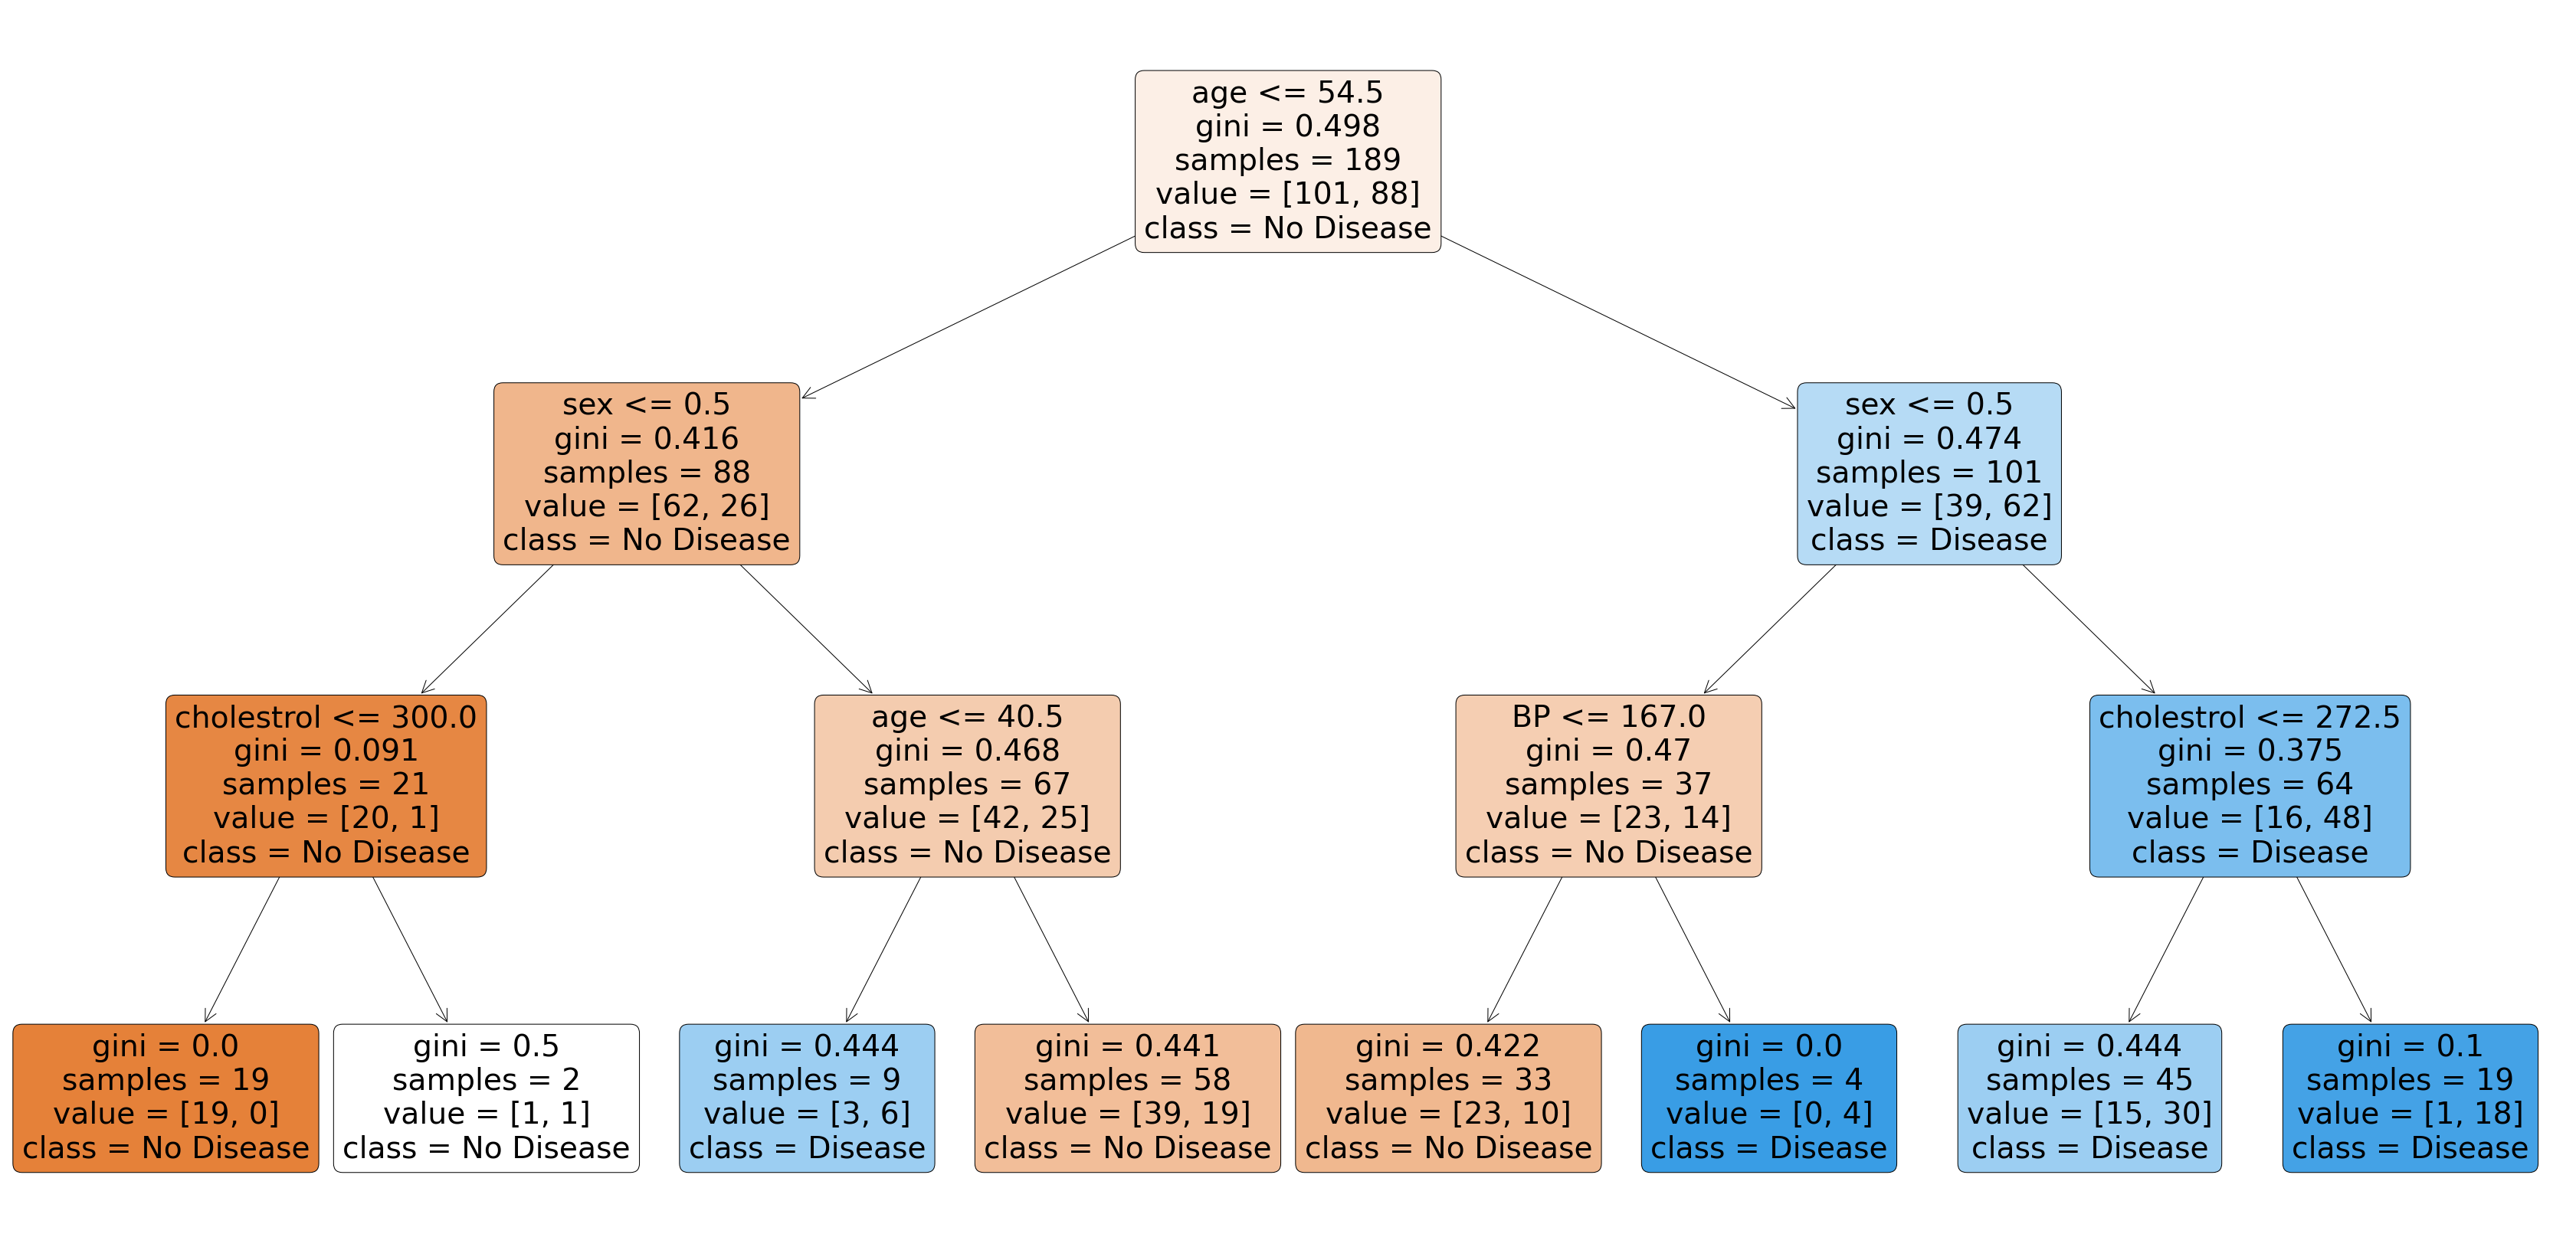

In [33]:
plt.figure(figsize=(60,30))
plot_tree(Dtree, feature_names=X.columns, filled=True, rounded=True, class_names=['No Disease','Disease'] )
plt.show()

In [34]:
y_train_pred= Dtree.predict(X_train)

In [35]:
y_test_pred= Dtree.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
accuracy_score(y_train,y_train_pred)

0.7407407407407407

In [47]:
accuracy_score(y_test, y_test_pred)

0.6049382716049383

In [48]:
confusion_matrix(y_train,y_train_pred)

array([[82, 19],
       [30, 58]])

In [49]:
confusion_matrix(y_test, y_test_pred)

array([[35, 14],
       [18, 14]])

# Helper Functions

In [42]:
def plot_Dtree(dt_classifier):
    plt.figure(figsize=(60,30))
    plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True, class_names=['No Disease','Disease'] )
    plt.show()

In [54]:
def evaluation(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print('Training set evaluation')
    print(accuracy_score(y_train,y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print('-'*50)
    print('Test set evaluation')
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))


In [55]:
evaluation(Dtree)

Training set evaluation
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set evaluation
0.6049382716049383
[[35 14]
 [18 14]]


In [81]:
Dtree1=DecisionTreeClassifier(min_samples_leaf=15,max_depth=4, random_state=42)

In [82]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=42)

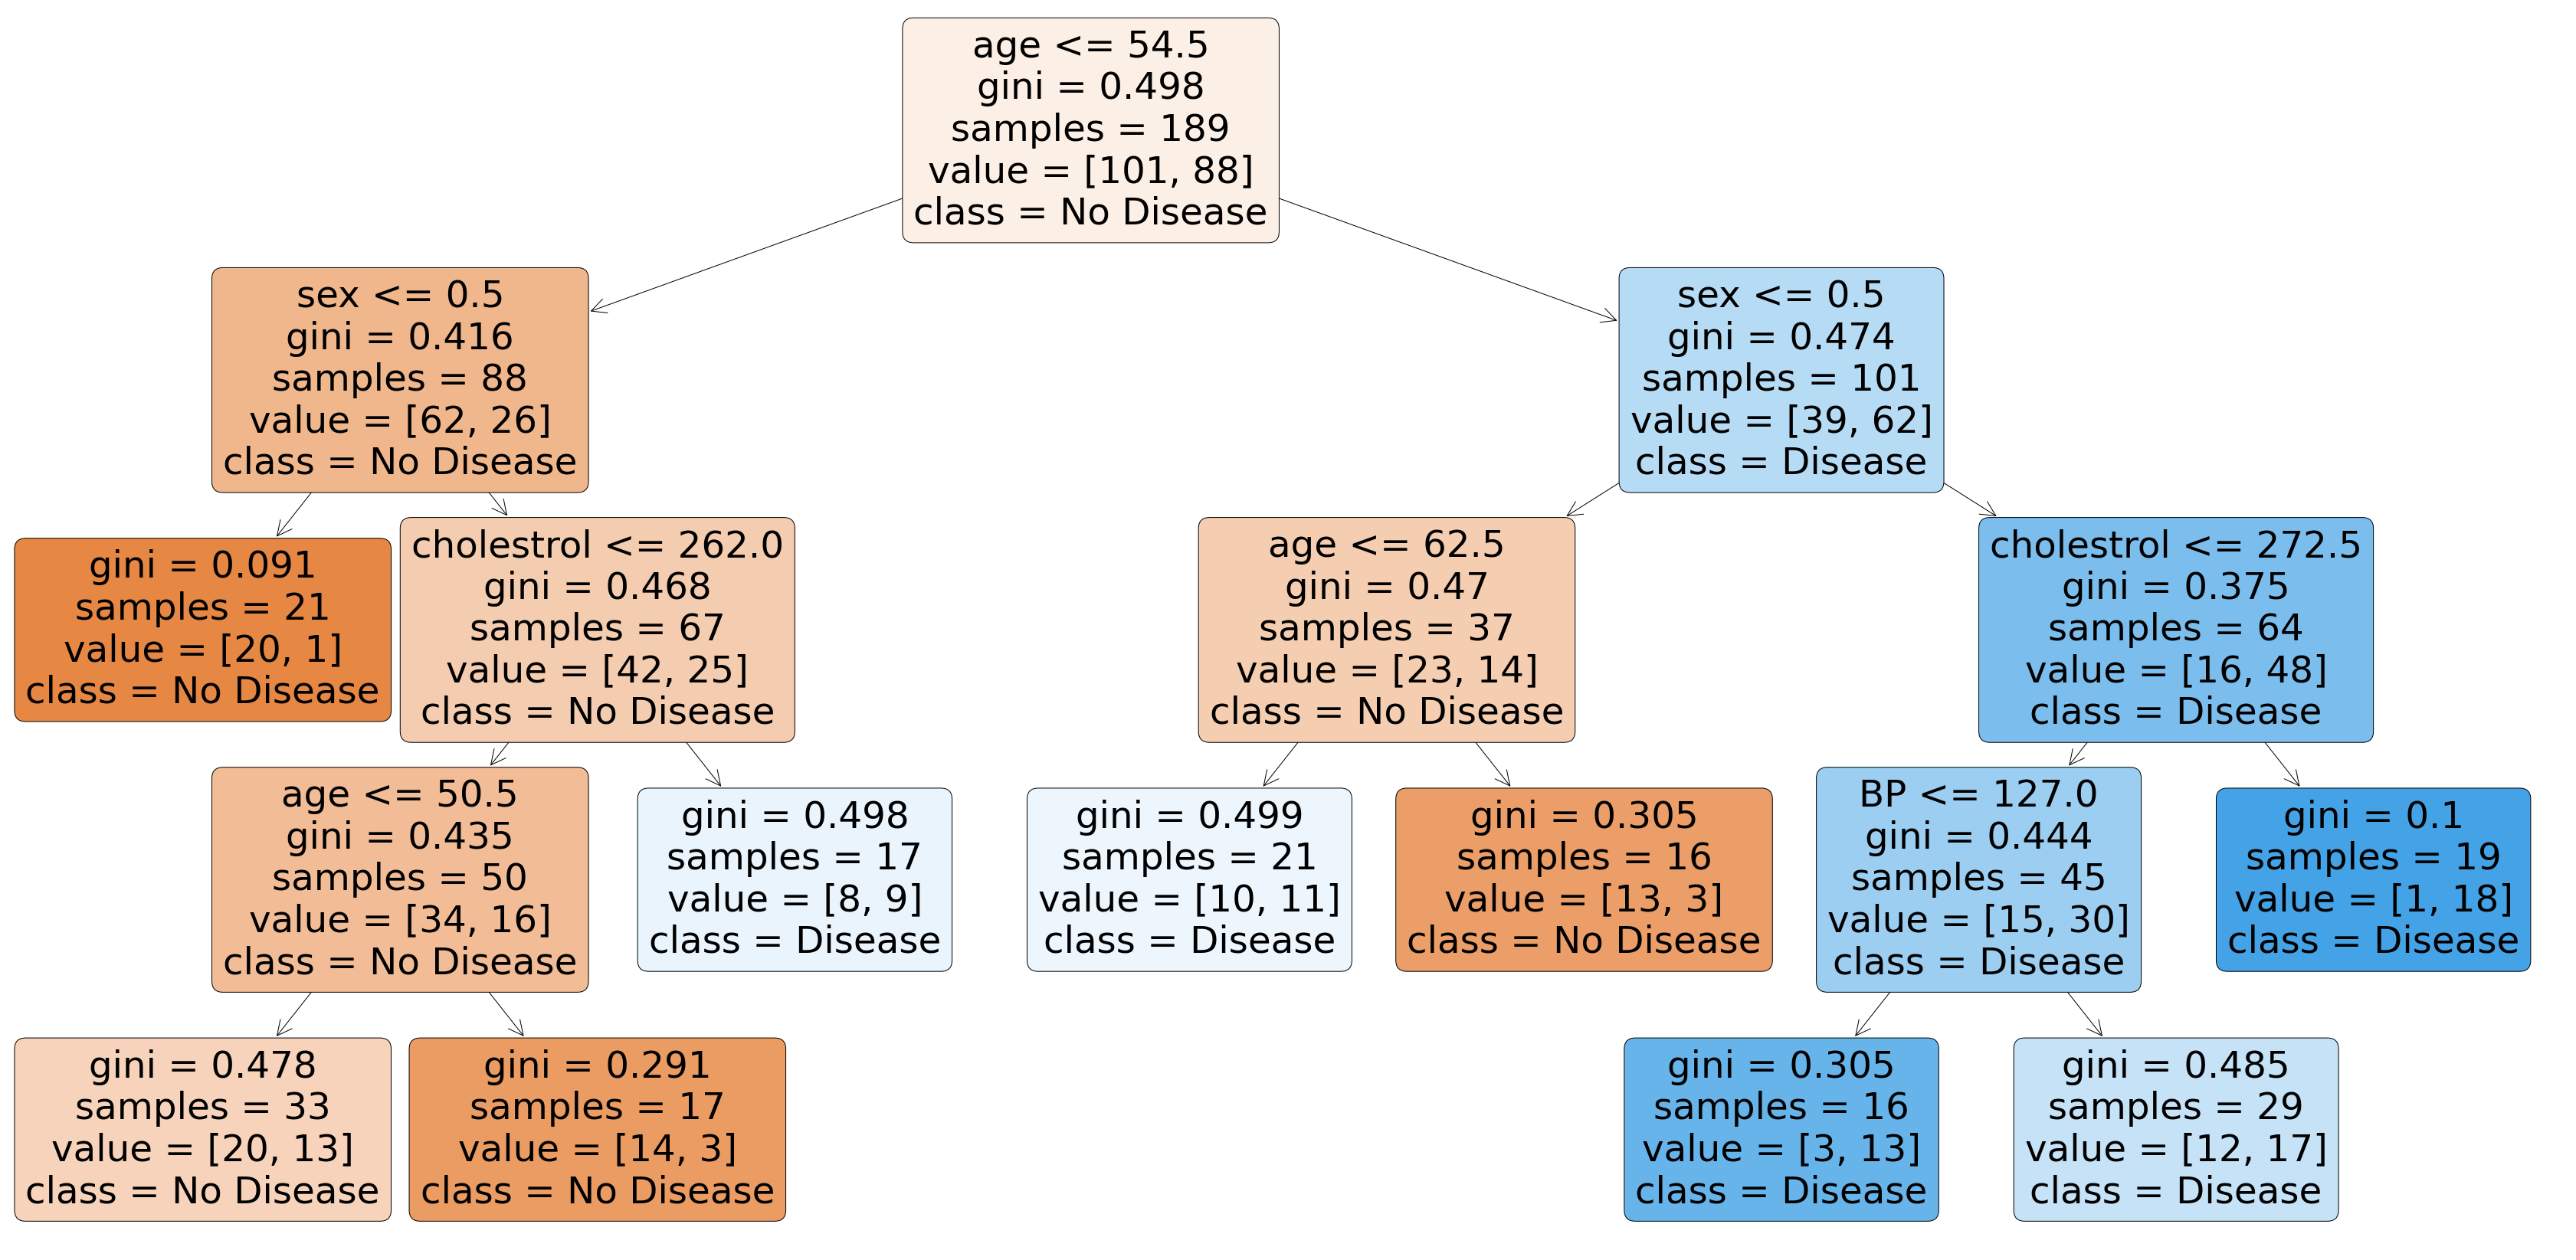

In [83]:
plot_Dtree(Dtree1)

In [85]:
evaluation(Dtree1)

Training set evaluation
0.7142857142857143
[[67 34]
 [20 68]]
--------------------------------------------------
Test set evaluation
0.6666666666666666
[[33 16]
 [11 21]]


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
params={'max_depth': [2,3,4,5,6,10,15,20], 'min_samples_leaf': [5,7,10,12,15,18,20,25], 'criterion': ['gini', 'entropy']}

In [89]:
grid_search=GridSearchCV(estimator=Dtree, param_grid= params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

In [90]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.8s


CPU times: user 1.27 s, sys: 440 ms, total: 1.71 s
Wall time: 12.7 s


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   12.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10, 15, 20],
                         'min_samples_leaf': [5, 7, 10, 12, 15, 18, 20, 25]},
             scoring='accuracy', verbose=1)

In [93]:
df=pd.DataFrame(grid_search.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014165,0.003750,0.008673,0.002585,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.02009,3
1,0.013071,0.002377,0.015716,0.007955,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.02009,3
2,0.018611,0.007720,0.012855,0.007793,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.02009,3
3,0.011859,0.002234,0.010882,0.002166,gini,2,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.02009,3
4,0.014201,0.003064,0.010430,0.003258,gini,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.02009,3


In [95]:
df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.018349,0.010317,0.014529,0.012394,gini,4,5,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.684211,0.789474,0.736842,0.578947,0.729730,0.703841,0.070818,1
88,0.012093,0.005203,0.007481,0.000670,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.684211,0.763158,0.736842,0.631579,0.675676,0.698293,0.046592,2
0,0.014165,0.003750,0.008673,0.002585,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,3
1,0.013071,0.002377,0.015716,0.007955,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,3
2,0.018611,0.007720,0.012855,0.007793,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,3


In [104]:
Dtree_best=grid_search.best_estimator_

In [105]:
evaluation(Dtree_best)

Training set evaluation
0.7777777777777778
[[82 19]
 [23 65]]
--------------------------------------------------
Test set evaluation
0.6419753086419753
[[35 14]
 [15 17]]


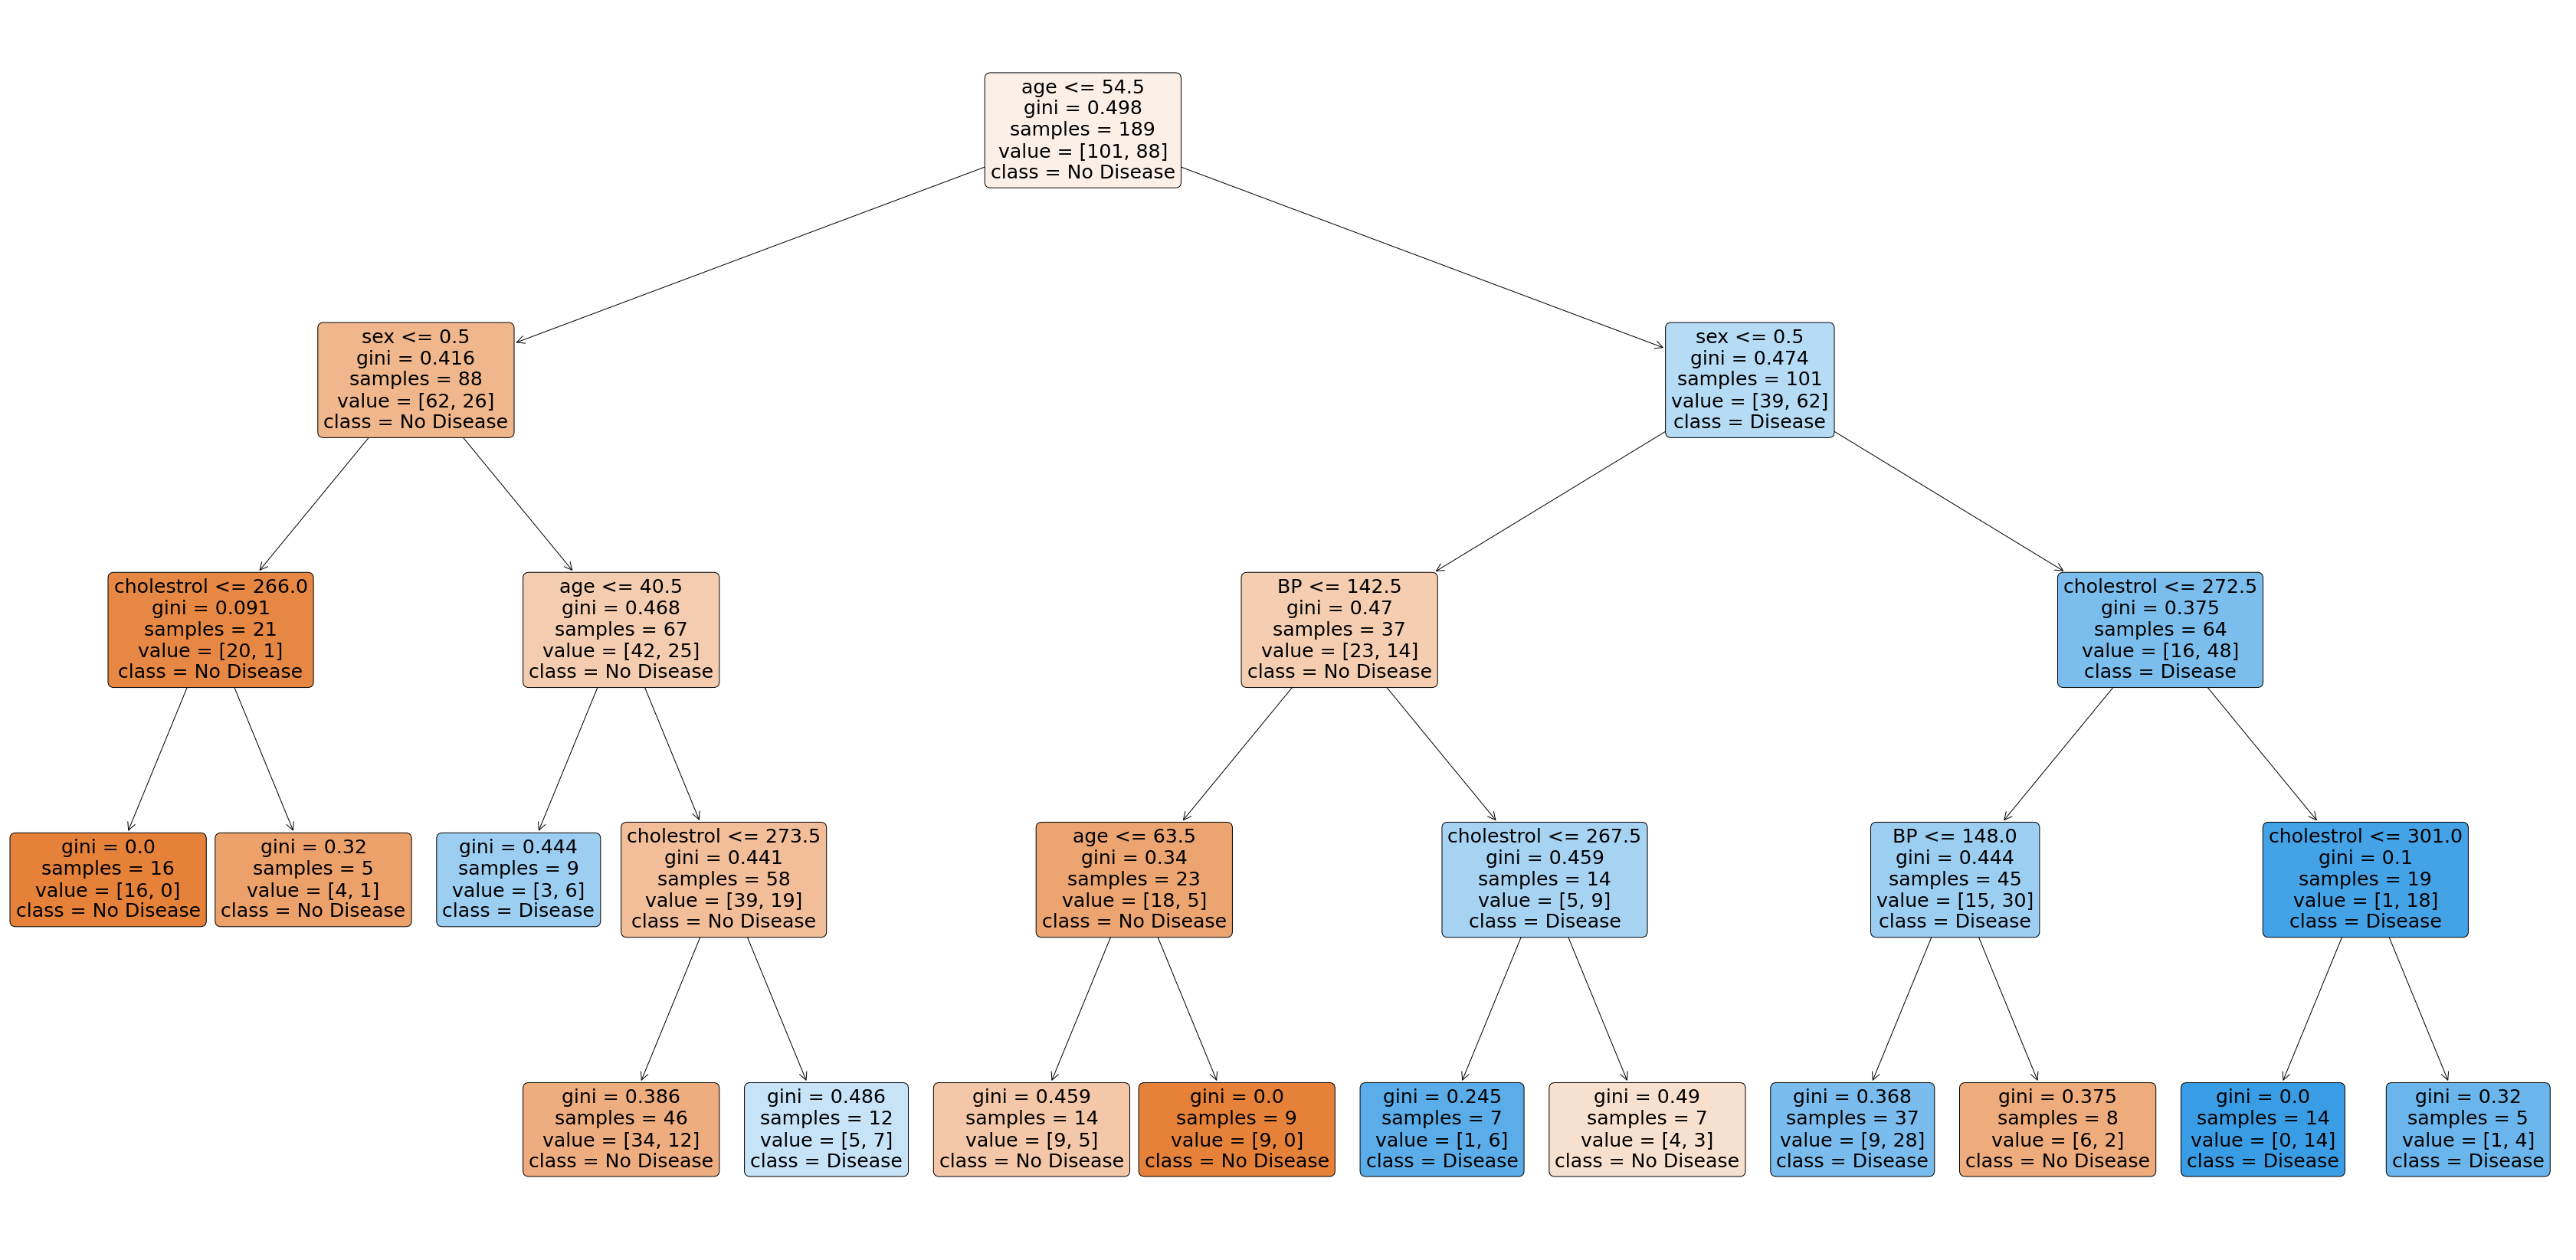

In [100]:
plot_Dtree(Dtree_best)

# Random Forrest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf= RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [120]:
sample_tree=rf.estimators_[1]

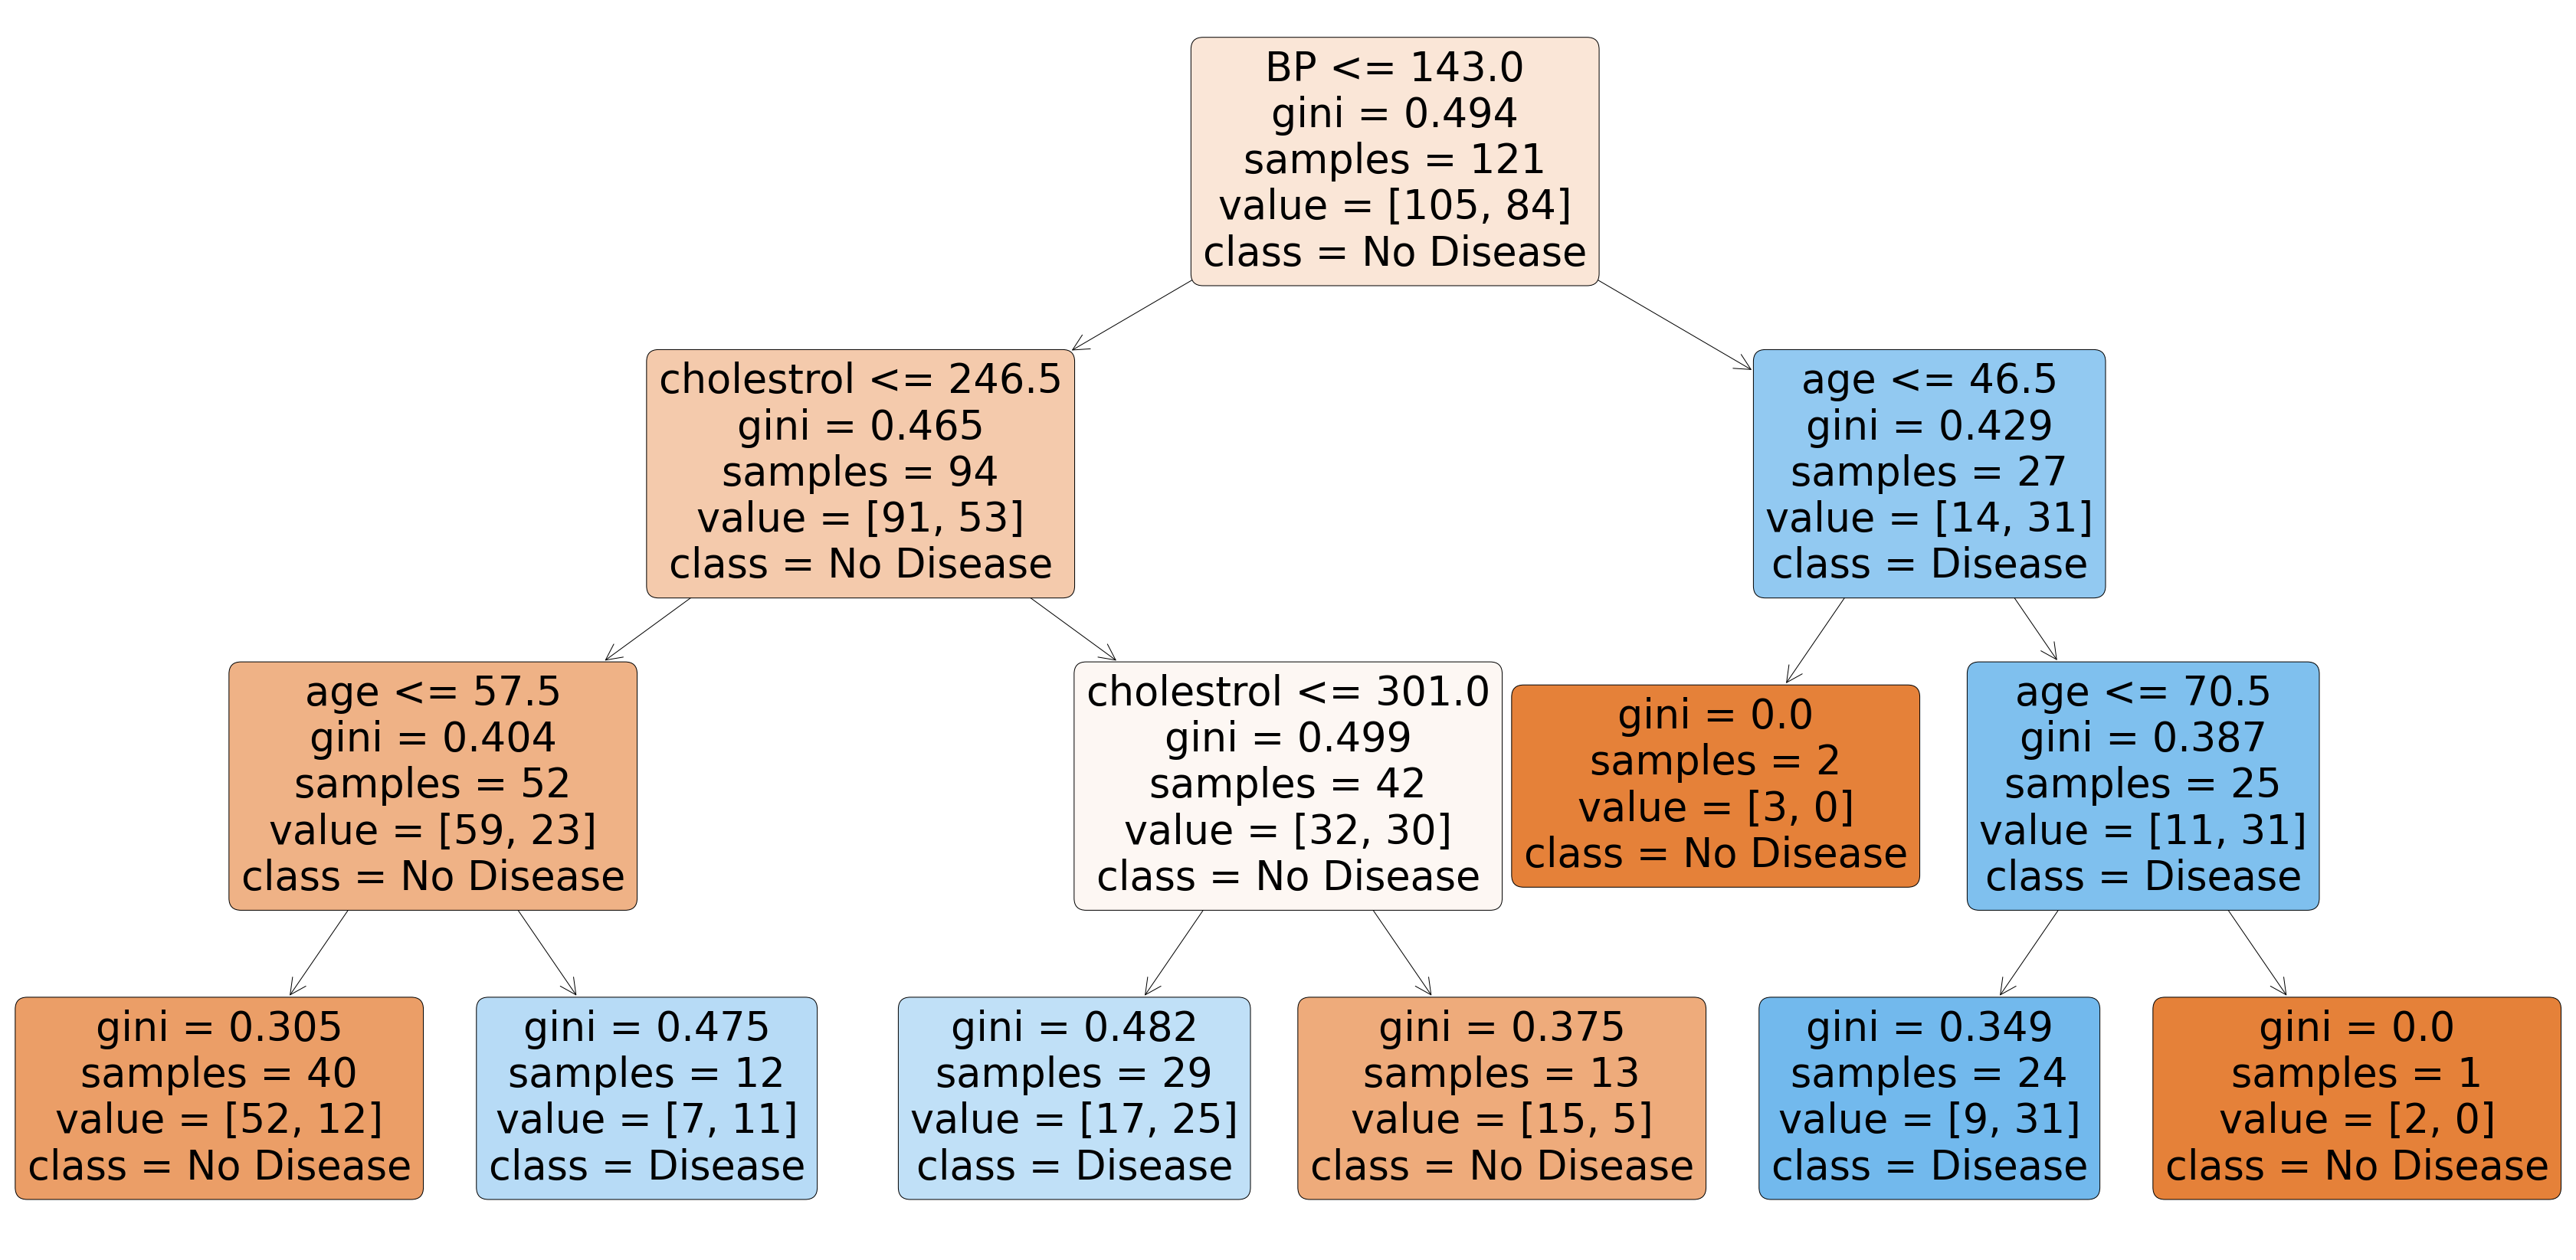

In [121]:
plot_Dtree(sample_tree)

In [123]:
rf.oob_score_

0.6349206349206349

In [124]:
evaluation(rf)

Training set evaluation
0.7407407407407407
[[80 21]
 [28 60]]
--------------------------------------------------
Test set evaluation
0.6172839506172839
[[35 14]
 [17 15]]


In [126]:
rf_new= RandomForestClassifier(random_state=42, oob_score=True)

In [127]:
params={'max_depth':[3, 4, 5, 7, 10], 'min_samples_leaf': [5,7,10,15,20,25,50], 'n_estimators': [10, 15, 20, 25, 30, 35], 
       'max_features': [2, 3, 4, 5]}

In [128]:
grid_search1=GridSearchCV(n_jobs=-1, estimator= rf_new, param_grid=params, verbose=1, cv=4, scoring='accuracy')

In [129]:
%%time
grid_search1.fit(X,y)

Fitting 4 folds for each of 600 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   58.8s


CPU times: user 3.61 s, sys: 330 ms, total: 3.94 s
Wall time: 1min 19s


[Parallel(n_jobs=-1)]: Done 2393 out of 2400 | elapsed:  1.3min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.3min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7, 10],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 7, 10, 15, 20],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring='accuracy', verbose=1)

In [135]:
rf_best= grid_search1.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=20, oob_score=True, random_state=42)

In [136]:
evaluation(rf_best)

Training set evaluation
0.8095238095238095
[[87 14]
 [22 66]]
--------------------------------------------------
Test set evaluation
0.7901234567901234
[[43  6]
 [11 21]]


In [143]:
rf_n=RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators= 150, max_depth=5, oob_score=True)

In [144]:
rf_n.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [146]:
imp=rf_n.feature_importances_

In [148]:
fea_imp= pd.DataFrame({
    'features':X_train.columns,
    'Imp': imp
})

In [150]:
fea_imp.sort_values(by='Imp', ascending=False)

,features,Imp
0,age,0.363297
3,cholestrol,0.279068
2,BP,0.214520
1,sex,0.143115


In [197]:
lg=[]
def list_input():
    n= int(input('enter number of elements to create list:'))
    for i in range(0,n):
        ele=int(input())
        lg.append(ele)
    return lg

In [222]:
def list_eval(lg):
    if all(i<j for i,j in zip(lg,lg[1:])):
        print('yes')
    else:
        print('no')
        

In [226]:
list_input()
list_eval(lg)

enter number of elements to create list:3
1
2
3
no


In [247]:
def new_func():
    l1=[]
    ol=input('Enter a positive integer:')
    for x in ol:
        l1.append(int(x))
    s=sum(l1)
    if s%2==0:
        print('even')
    else:
        print('odd')

In [248]:
new_func()

Enter a positive integer:1235
odd


In [ ]:
res=[int(x) for x in str(1234)]
res

In [241]:
sum(res)

10

In [249]:
import ast,sys
input_str = sys.stdin.read()
votes = ast.literal_eval(input_str)

SyntaxError: unexpected EOF while parsing (<unknown>, line 0)